##  Programmieraufgabe 4 

<span style="color:red; font-weight: bold">Wichtig: Damit alle ben&ouml;tigten Pakete richtig eingebunden werden, f&uuml;hren Sie die n&auml;chste Zelle einmal aus, sobald Sie das Notebook neu &ouml;ffnen.</span>

In [1]:
# some setup
%matplotlib inline
import numpy as np # makes numpy routines and data types available as np.[name ouf routine or data type]
import matplotlib.pyplot as plt # makes plotting command available as plot.[name of command]

from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

import random

## Evolution der Verteilungsfunktion einer Markov Kette

Betrachten Sie die Markov Kette $(X_n)_{n\geq 1}$ auf $S=\{0,1,\ldots,N-1\}$ mit Übergangsmatrix 
$P=\begin{bmatrix}
0 & 1 & 0 & \cdots & 0 \\
q & 0 & p & \ddots & \vdots \\
0 & \ddots & \ddots & \ddots & 0 \\
\vdots & \ddots  & q & \ddots & p\\
0 & \cdots & 0 & 1 & 0
\end{bmatrix}$
mit $N\geq 2$ und $p$ beliegig und $q=1-p$. Die stationäre Verteilung $M_{inv}$ ist proportinal zu
$\nu=(\nu_0,\dotsc, \nu_{N-1})$ mit $\nu_0=1$, $\nu_i=p^{i-1}/q^{i}$, $1\leq i \leq N-2$ und $\nu_{N-1}=p^{N-2}/q^{N-2}$.

a) Definiere eine Funktion, $\texttt{Minv}$, die als Input $N,p$ nimmt und als Output die stationäre Verteilung $M_{inv}=(M_{inv}(x))_{0\leq x\leq N-1}$ gibt.

b) Erstellen Sie einen Plot von $M_{inv}$ für $N=20,p=1/2$ und $N=20,p=1/3$.

[0.006676751343174592, 0.01669187835793648, 0.025037817536904712, 0.037556726305357065, 0.056335089458035593, 0.08450263418705341, 0.12675395128058006, 0.19013092692087008, 0.28519639038130506, 0.17111783422878304]


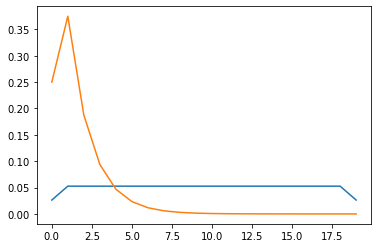

In [2]:
#(a)
def Minv(N, p):
    mueh = []
    mueh.append(1)
    q = 1 - p
    for i in range(N-2):
        vi = pow(p, i)/(pow(q, i+1))
        mueh.append(vi)
    
    mueh.append(pow(p, N-2)/(pow(q, N-2)))
    total = sum(mueh)
    for i in range(N):
        mueh[i] = mueh[i]/total
        
    return mueh


mueh = Minv(10,0.6)
print(mueh)
#print(sum(mueh))
#(b)
plt.plot(Minv(20,0.5))
plt.plot(Minv(20, 1/3))

c) Definiere eine Funktion $\texttt{Transition}$, die als Input $n,p$ und ein Vektor mit einer Wahrscheinlichkeitsverteilung der Markovkette hat, und als Output die Wahrscheinlichkeitsverteilung nach eine Zeiteinheit wiedergibt. Testen Sie es in dem für $N=20$ und $p=1/3$ mit $\texttt{print(Minv(N,p)-Transition(N,p,Minv(N,p)))}$ (es sollte $0$ ergeben, bis auf Numerische Rundungen)



In [3]:
#(c)

p = 0.5
N = 10

def create_MC(N,p):
    q = 1-p
    MC = np.zeros( (N, N) )
    MC[0][1] = 1

    for i in range(1,N-1):
        for j in range(N):
            if j == (i - 1):
                MC[i, j] = q
            elif j == (i+1):
                MC[i, j] = p

    MC[N-1][N-2] = 1
    return MC
print(create_MC(N,p))

def Transition(N,p, mueh):
    MC = create_MC(N,p)
    trans = np.matmul(mueh, MC)
    return trans

for i in range(N):
    print(Minv(N,p)[i] - Transition(N, p, Minv(N,p))[i])


[[0.  1.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.  0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  1.  0. ]]
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


d) Für die Anfangsbedingung $P(X_0=0)=1$, definiere eine Funktion, die als Input $t$ und als Output ein Plot der Wahrscheinlichkeitsverteilung der Markov Kette zur Zeit $t$.

Für $N=10$, $p=1/2$ und $T=50$, erstellen Sie mithilfe von 𝚒𝚗𝚝𝚎𝚛𝚊𝚌𝚝𝚒𝚟𝚎 ein entsprechendes Histogramm für Wahrscheinlichkeitsverteilung der Markov Kette in den Zeitintervall $[0,T]$. Was beobachten Sie? Scheint die Wahrscheinlichkeitsverteilung zu konvergieren?

In [20]:
#(d)
N = 10
p = 0.5
T = 50
mueh0 = np.zeros(N)
mueh0[0] = 1

def Transition_t(N,p,t,mueh):
    MC = create_MC(N,p)
    trans = MC
    for i in range(t):
        trans = np.matmul(trans, MC)
        
   
    return np.matmul(mueh, trans)       

def update(k):
    mueh = Transition_t(N, p, k, mueh0)
    plt.plot(mueh)
    
interact(update, k=widgets.IntSlider(min=0, max=T, step=1, value=1))


interactive(children=(IntSlider(value=1, description='k', max=50), Output()), _dom_classes=('widget-interact',…

<function __main__.update(k)>

(e) Setze jetzt $\varepsilon=0.1$ fest. Betrachten wir die eine modifizierte Markov Kette, wobei wenn man auf $0$ (bzw. $N-1$) bleibt man dort with Wahrscheinlichkeit $\varepsilon$ und spring beim Nachbarn mit Wahrscheinlichkeit $1-\varepsilon$. Definiere eine Funktion $\texttt{TransitionEps}$, die als Input $n,p$ und ein Vektor mit einer Wahrscheinlichkeitsverteilung dieser neue Markovkette hat, und als Output die Wahrscheinlichkeitsverteilung nach eine Zeiteinheit wiedergibt.

Ist $\texttt{Minv(N,p)}$ noch invariant?

Wiederhole (d) mit dieser neue Markovkette in der Zeitintervall $[0,T]$ mit $T=1000$. Wie sieht mit der Kongergenz aus?

(f) Speichere für jedes $t\in [0,T]$, den $L^2$ Abstand zur stationäre Verteilung: $D(t)=N^{-1}\sum_{j=0}^{N-1} (Minv(N,p)_j-Mass(\textrm{Zeit }t)_j)^2$

Erstellen Sie den plot $(t,D(t))_{t\in [0,T]}$ und $(t,np.log(D(t)))_{t\in [0,T]}$. Sehen Sie, dass die $L^2$ konvergent zur stationäre Verteilung ist exponential schnell?

[[0.1 0.9 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.  0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.9]]
-0.005555555555555557
0.005555555555555564
0.0
0.0
0.0
0.0
0.0
0.0
0.049999999999999996
-0.05


interactive(children=(IntSlider(value=0, description='k', max=1000, step=50), Output()), _dom_classes=('widget…

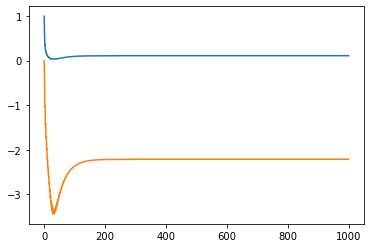

In [26]:
#(e) 
e = 0.1
N = 10
p = 0.5
def create_MC2(N,p):
    q = 1-p
    MC = np.zeros( (N, N) )
    MC[0][0] = e
    MC[0][1] = 1-e
    MC[N-1][N-2] = e
    MC[N-1][N-1] = 1-e 
    
    for i in range(1,N-1):
        for j in range(N):
            if j == (i - 1):
                MC[i, j] = q
            elif j == (i+1):
                MC[i, j] = p


    return MC

print(create_MC2(N,p))

def TransitionEps(N, p, t, mueh):
    MC = create_MC2(N,p)
    trans = mueh
    for i in range(t):
        trans = np.matmul(trans, MC)
        
    return trans 

for i in range(N):
    print(Minv(N,p)[i] - TransitionEps(N, p, 1, Minv(N,p))[i])

T = 1000
def update2(k):
    mueh = TransitionEps(N, p, k, mueh0)
    plt.plot(mueh)
    
interact(update2, k=widgets.IntSlider(min=0, max=T, step=50, value=0))


#(f)
dist = []
def total_dist(N, mueh1, mueh2):
    loc_dist = 0
    for i in range(N):
        loc_dist = loc_dist + pow((mueh1[i] - mueh2[i]),2)
    return loc_dist

stat = Minv(N,p)
for i in range(T):
    dist.append(total_dist(N, stat, TransitionEps(N, p, i, mueh0)))

plt.plot(range(T), dist)
plt.plot(range(T), np.log(dist))